## Visualización de zonas

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
dataset_path = "Proyecto_AYUDAME_Datasets/AYUDAME_03"
dataset_path = os.path.abspath(dataset_path)
zones_path = os.path.join(dataset_path,"zones")

In [3]:
zones = os.listdir(zones_path)
zones.sort()

In [4]:
def get_keyframe_img(keyframe_name):
    key_img_name = keyframe_name.replace(".ply",".png")
    img = cv.imread(dataset_path+"/rgb_pcd/"+key_img_name)
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)


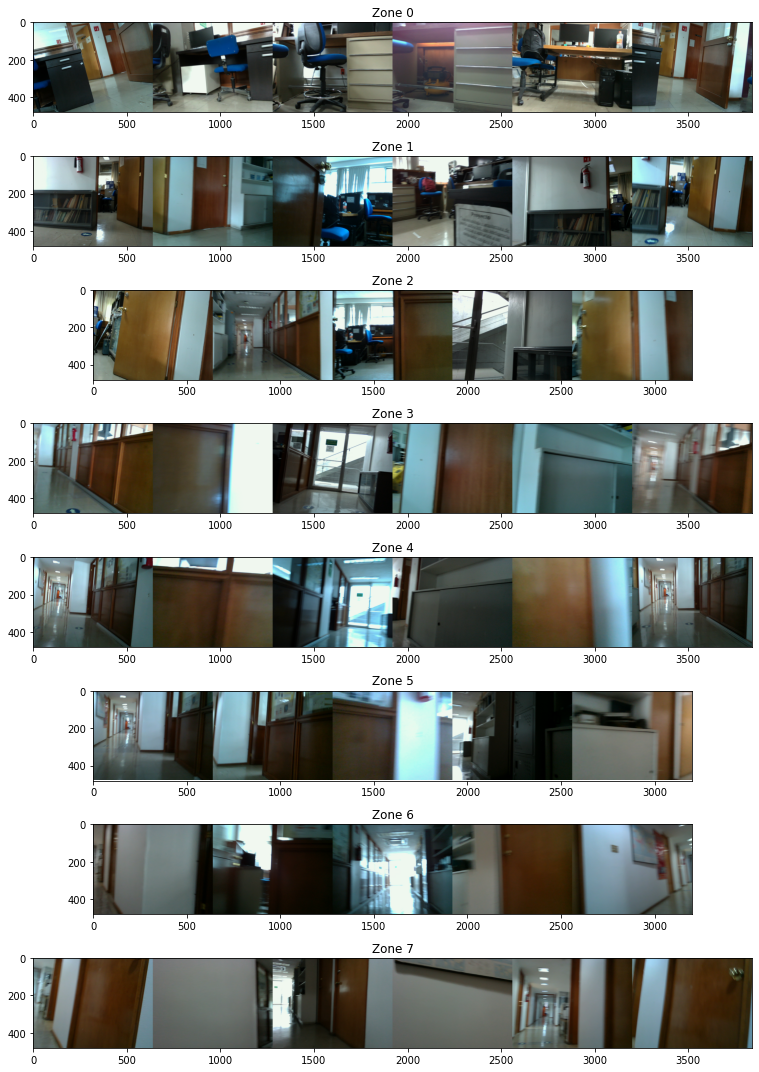

In [6]:
# The number of keyframes to show
num_keyframes = 5
fig, axs = plt.subplots(len(zones),figsize=(40,15))
for i in range(len(zones)):
    # Read the directory of each zone
    plys = os.listdir(os.path.join(zones_path,zones[i]))
    plys.sort()
    num_plys = len(plys)
    plys = np.asarray(plys)
    # Get the name of the keyframes
    keyframes_names = plys[np.arange(start=0,stop=num_plys,step=num_plys//num_keyframes)]
    # Extract the images of each keyframe
    keyframes = list(map(get_keyframe_img,keyframes_names))
    # Generate a image where each frame is stacked horizontaly
    img_conca = np.hstack(keyframes)
    # Render the keyframes for each zone
    axs[i].set_title(f"Zone {i}")
    axs[i].imshow(img_conca)
plt.tight_layout()